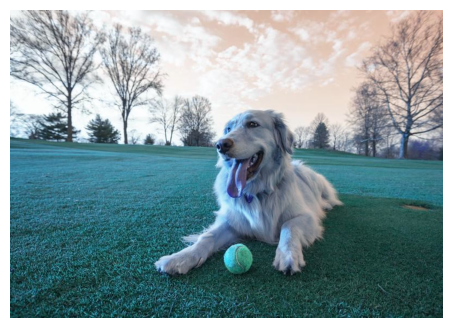

In [72]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread(r"dogpark.jpg")
plt.figure(figsize=(6, 4))
plt.imshow(image)
plt.axis('off')
plt.show()

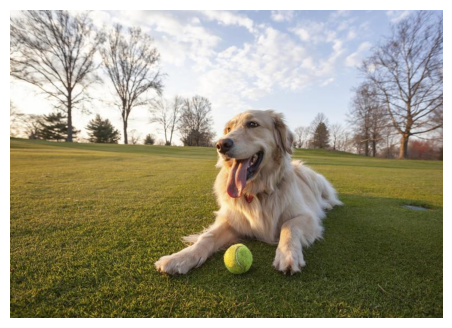

In [74]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 4))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# DFT before equalization

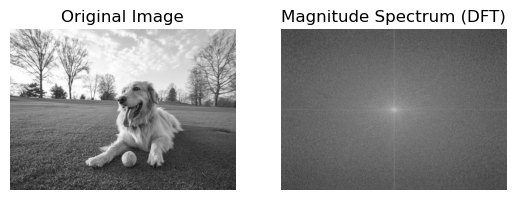

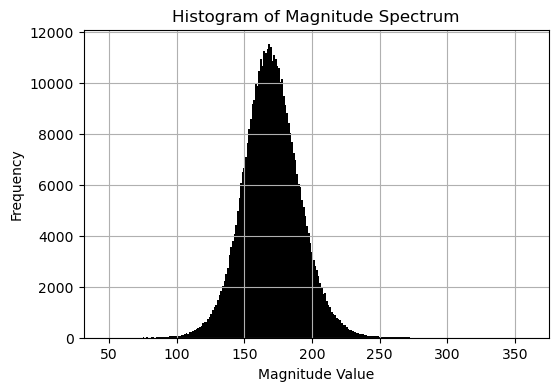

In [78]:
import numpy as np
image = cv2.imread(r"dogpark.jpg", cv2.IMREAD_GRAYSCALE)
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)  
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)


plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")


plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap="gray")
plt.title("Magnitude Spectrum (DFT)")
plt.axis("off")

plt.show()

plt.figure(figsize=(6, 4))
plt.hist(magnitude_spectrum.ravel(), bins=256, color='black')
plt.title("Histogram of Magnitude Spectrum")
plt.xlabel("Magnitude Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


## dft after equalization

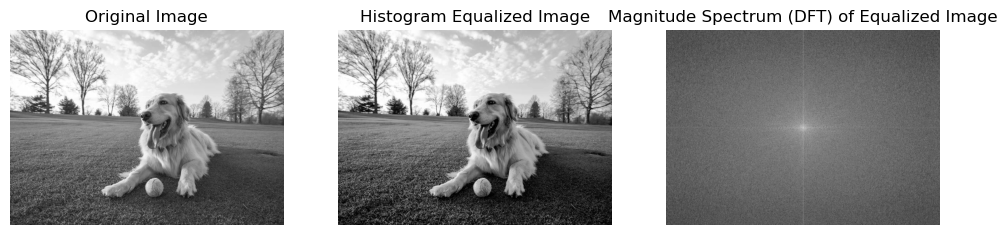

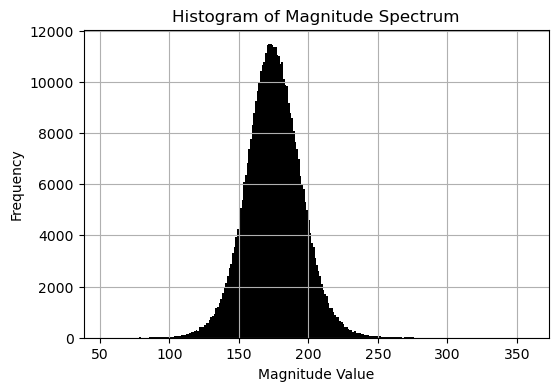

In [80]:

image = cv2.imread(r"dogpark.jpg", cv2.IMREAD_GRAYSCALE)
equalized_image = cv2.equalizeHist(image)
plt.figure(figsize=(12, 6))


plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")


plt.subplot(1, 3, 2)
plt.imshow(equalized_image, cmap="gray")
plt.title("Histogram Equalized Image")
plt.axis("off")


dft = cv2.dft(np.float32(equalized_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)  # Shift zero frequency to the center
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)


plt.subplot(1, 3, 3)
plt.imshow(magnitude_spectrum, cmap="gray")
plt.title("Magnitude Spectrum (DFT) of Equalized Image")
plt.axis("off")
plt.show()


plt.figure(figsize=(6, 4))
plt.hist(magnitude_spectrum.ravel(), bins=256, color='black')
plt.title("Histogram of Magnitude Spectrum")
plt.xlabel("Magnitude Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [84]:
height, width = image.shape
print(height)
print(width)

570
800


## blurring the image

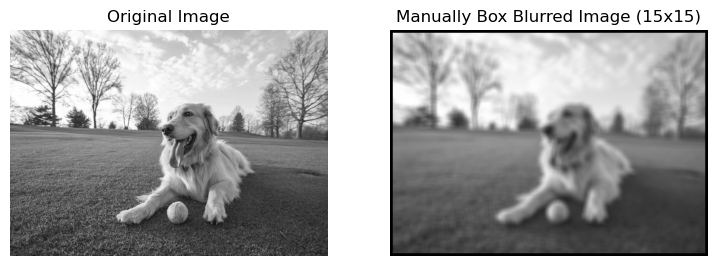

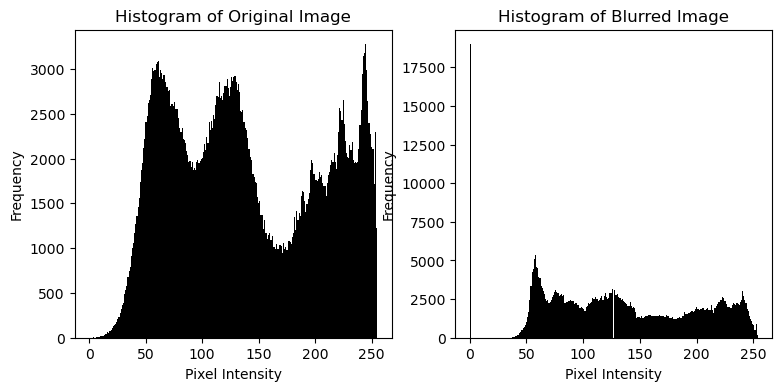

In [86]:

image = cv2.imread(r"dogpark.jpg", cv2.IMREAD_GRAYSCALE)

# Get the dimensions of the image
height, width = image.shape

# Create an empty image to store the blurred version
blurred_image = np.zeros_like(image)

# Define a 15x15 Box Blur kernel (normalized to 1/225)
kernel = np.ones((15, 15)) / 225  # 15x15 kernel for stronger blur

# Loop through each pixel in the image (ignoring the borders for simplicity)
for i in range(7, height - 7):  # Adjusting to handle the edges better for 15x15 kernel
    for j in range(7, width - 7):  # Adjusting to handle the edges better for 15x15 kernel
        # Extract the 15x15 neighborhood around the current pixel
        region = image[i - 7:i + 8, j - 7:j + 8]  # Extract a 15x15 region
        
        # Apply the kernel: multiply the kernel with the region and sum up the result
        blurred_image[i, j] = np.sum(region * kernel)

# Convert the result to an integer type (to prevent display issues)
blurred_image = np.uint8(blurred_image)

# Display the original and manually blurred image
plt.figure(figsize=(9,4))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Blurred Image
plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap="gray")
plt.title("Manually Box Blurred Image (15x15)")
plt.axis("off")

plt.show()

# Plot histograms for original and blurred images
plt.figure(figsize=(9, 4))

# Histogram for original image
plt.subplot(1, 2, 1)
plt.hist(image.ravel(), bins=256, color='black')
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")


# Histogram for blurred image
plt.subplot(1, 2, 2)
plt.hist(blurred_image.ravel(), bins=256, color='black')
plt.title("Histogram of Blurred Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")


plt.show()


## sharpening

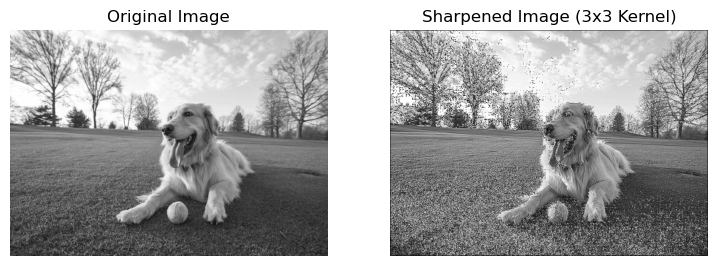

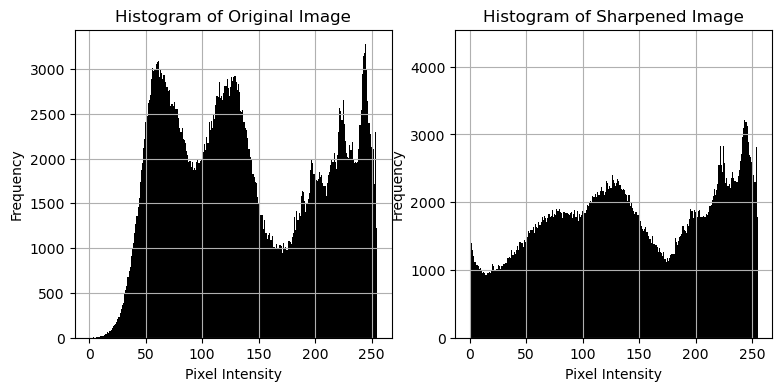

In [88]:
image = cv2.imread(r"dogpark.jpg", cv2.IMREAD_GRAYSCALE)

# Get the dimensions of the image
height, width = image.shape

# Create an empty image to store the sharpened version
sharpened_image = np.zeros_like(image)

# Define a 3x3 Sharpening kernel
sharpening_kernel = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
])

# Loop through each pixel in the image (ignoring the borders for simplicity)
for i in range(1, height - 1):  # Starting at 1 to avoid going out of bounds
    for j in range(1, width - 1):  # Same here
        # Extract the 3x3 neighborhood around the current pixel
        region = image[i - 1:i + 2, j - 1:j + 2]
        
        # Apply the sharpening kernel: multiply the kernel with the region and sum up the result
        sharpened_image[i, j] = np.sum(region * sharpening_kernel)

# Convert the result to an integer type (to prevent display issues)
sharpened_image = np.uint8(sharpened_image)

# Display the original and manually sharpened image
plt.figure(figsize=(9, 4))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Sharpened Image
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap="gray")
plt.title("Sharpened Image (3x3 Kernel)")
plt.axis("off")

plt.show()

# Plot histograms for original and sharpened images
plt.figure(figsize=(9, 4))

# Histogram for original image
plt.subplot(1, 2, 1)
plt.hist(image.ravel(), bins=256, color='black')
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)

# Histogram for sharpened image
plt.subplot(1, 2, 2)
plt.hist(sharpened_image.ravel(), bins=256, color='black')
plt.title("Histogram of Sharpened Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)

plt.show()


## negative

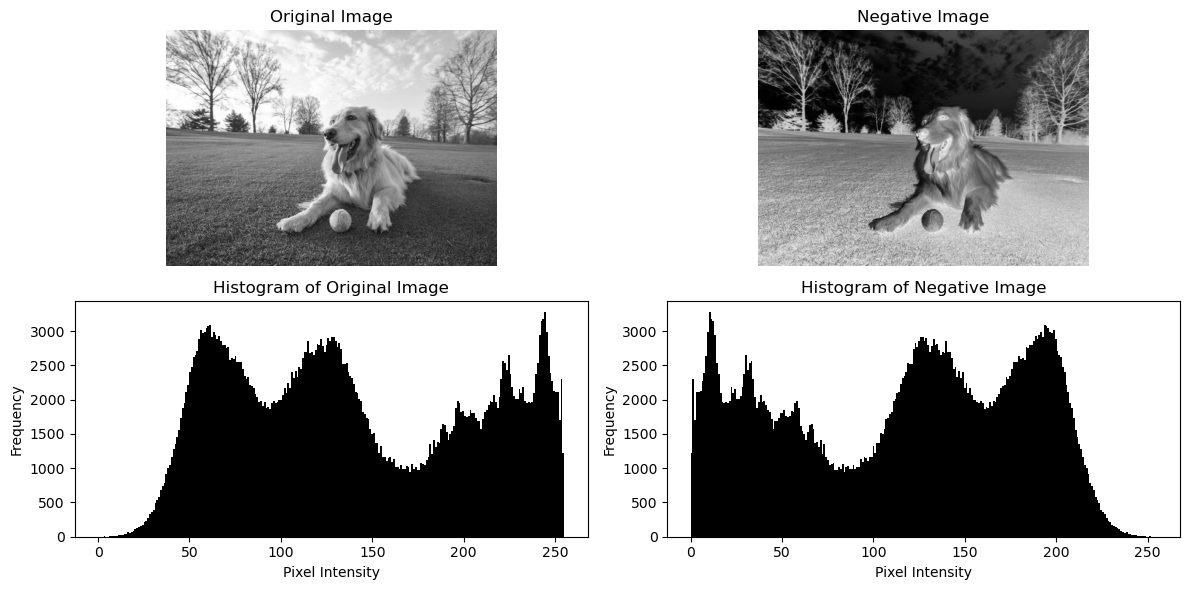

In [90]:
image = cv2.imread(r"dogpark.jpg", cv2.IMREAD_GRAYSCALE)
# Apply the negative effect: subtract each pixel from 255
negative_image = 255 - image

# Display the original and negative image
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Negative Image
plt.subplot(2, 2, 2)
plt.imshow(negative_image, cmap="gray")
plt.title("Negative Image")
plt.axis("off")

# Histograms for original and negative images
plt.subplot(2, 2, 3)
plt.hist(image.ravel(), bins=256, color='black')
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
plt.hist(negative_image.ravel(), bins=256, color='black')
plt.title("Histogram of Negative Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


## increaing the brightness

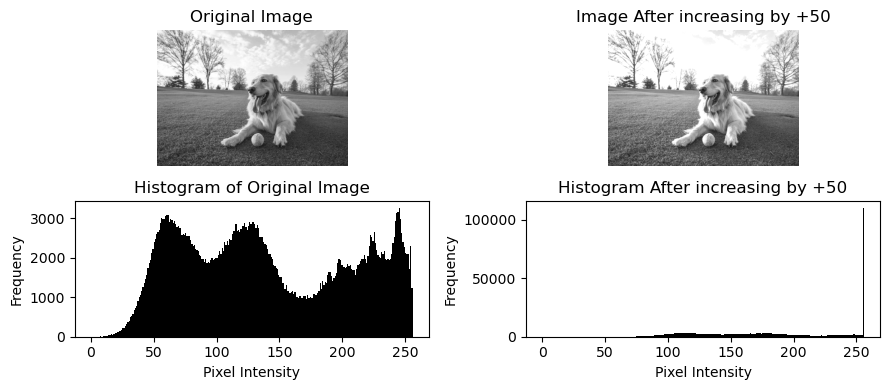

In [92]:

image = cv2.imread(r"dogpark.jpg", cv2.IMREAD_GRAYSCALE)
i2 = cv2.add(image, +50)
plt.figure(figsize=(9, 4))
plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Original Image")
plt.subplot(222)
plt.imshow(i2, cmap='gray')
plt.axis('off')
plt.title("Image After increasing by +50")
plt.subplot(223)
plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.subplot(224)
plt.hist(i2.ravel(), bins=256, range=[0, 256], color='black')
plt.title("Histogram After increasing by +50")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


## decreasing the brightness

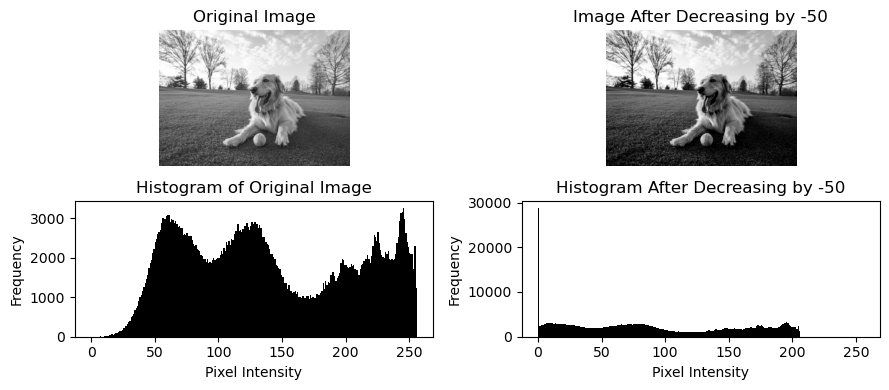

In [94]:

image = cv2.imread(r"dogpark.jpg", cv2.IMREAD_GRAYSCALE)
i2 = cv2.add(image, -50)
plt.figure(figsize=(9,4))
plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Original Image")
plt.subplot(222)
plt.imshow(i2, cmap='gray')
plt.axis('off')
plt.title("Image After Decreasing by -50")
plt.subplot(223)
plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.subplot(224)
plt.hist(i2.ravel(), bins=256, range=[0, 256], color='black')
plt.title("Histogram After Decreasing by -50")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


## stretching the image

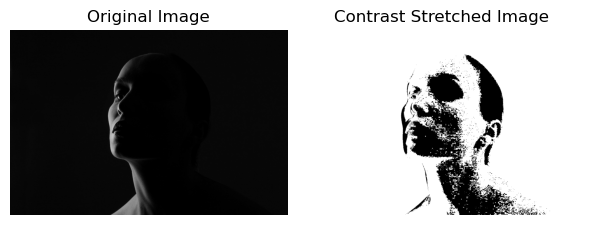

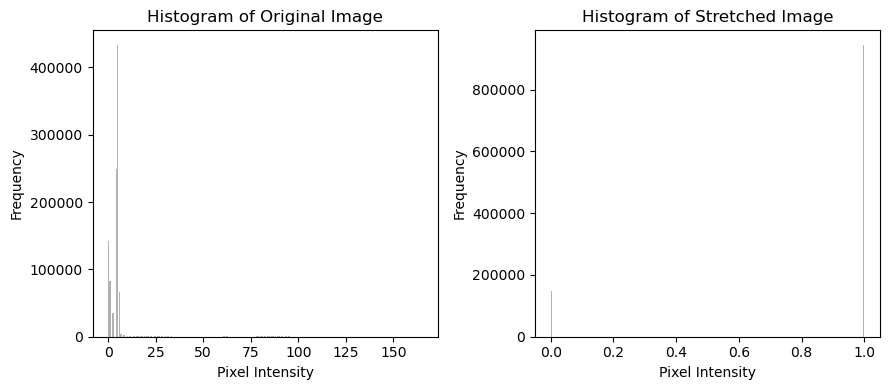

In [108]:
gray_image = cv2.imread(r"grewn.jpg", cv2.IMREAD_GRAYSCALE)

# Get the minimum and maximum pixel intensity values in the image
I_min = np.min(gray_image)
I_max = np.max(gray_image)

# Apply contrast stretching
stretched_image = np.clip(((gray_image - I_min) * 255) / (I_max - I_min), 0, 255).astype(np.uint8)

# Display the original image and the contrast stretched image using plt
plt.figure(figsize=(6, 6))

# Plot Original Image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot Contrast Stretched Image
plt.subplot(1, 2, 2)
plt.imshow(stretched_image, cmap='gray')
plt.title('Contrast Stretched Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Plot histograms for both original and contrast stretched images using plt
plt.figure(figsize=(9,4))

# Histogram of Original Image
plt.subplot(1, 2, 1)
plt.hist(gray_image.flatten(), bins=256, color='gray', alpha=0.6)
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Histogram of Stretched Image
plt.subplot(1, 2, 2)
plt.hist(stretched_image.flatten(), bins=256, color='gray', alpha=0.6)
plt.title('Histogram of Stretched Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## threshold the image

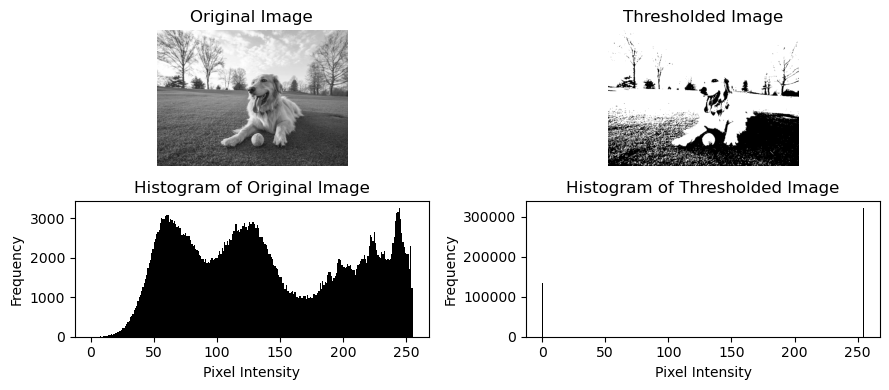

In [112]:
image = cv2.imread(r"dogpark.jpg", cv2.IMREAD_GRAYSCALE)



# Apply thresholding
val, t = cv2.threshold(image, 90, 255, cv2.THRESH_BINARY)

# Display the original and thresholded images along with histograms
plt.figure(figsize=(9, 4))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Thresholded Image
plt.subplot(2, 2, 2)
plt.imshow(t, cmap="gray")
plt.title("Thresholded Image")
plt.axis("off")

# Histogram of Original Image
plt.subplot(2, 2, 3)
plt.hist(image.ravel(), bins=256, color='black')
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Histogram of Thresholded Image
plt.subplot(2, 2, 4)
plt.hist(t.ravel(), bins=256, color='black')
plt.title("Histogram of Thresholded Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
